#### Eric Schneider
#### DS-160-1
#### Individual Project 3
#### Spring 2022
#### Version 1

In [1]:
import pandas
import numpy
import matplotlib.pyplot as pl
import seaborn
%matplotlib inline
import statsmodels.api as sm

In [2]:
#Part 1-3
'''
While I could have made 4 separate dataframes at once and then concatenated 
all of them at once, it is much more streamlined and functional to use the 
running data frame known as man. This is why I tackled the first 3 steps all in one.
'''

def combine_files(files):
    '''
    A function that takes the names of the different files.
    First, the function reads the individual file then converts 
    the date to mm/dd/yy format before changing it to a datetime. 
    Then it creates a column for the company name bfore finally 
    appending the dataframe to a running dataframe named man, 
    which is short for manufacturers.
    '''
    man=pandas.DataFrame()
    for sheets in files:
        sheet=pandas.read_csv(sheets)
        date=sheet.Date.str[3:6]+sheet.Date.str[0:3]+sheet.Date.str[6:]
        date=pandas.to_datetime(date)
        sheet.Date=date
        
        name=sheets[:-4]
        sheet.insert(0,'Company',name,allow_duplicates=True)
        
        man=pandas.concat([man,sheet])
    return man
man=combine_files(['50Hertz.csv','Amprion.csv','TenneTTSO.csv','TransnetBW.csv'])
man

,Company,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,50Hertz,2019-08-23,74.00,73.00,63.00,55.00,54.00,53.00,51.00,52.00,...,68.00,68.00,63.00,61.00,57.00,52.00,51.00,49.00,45.00,40.00
1,50Hertz,2019-08-24,37.00,38.00,35.00,35.00,31.00,32.00,30.00,29.00,...,118.00,118.00,112.00,107.00,104.00,104.00,99.00,95.00,95.00,96.00
2,50Hertz,2019-08-25,93.00,88.00,85.00,81.00,76.00,80.00,81.00,76.00,...,111.00,108.00,103.00,96.00,93.00,88.00,86.00,82.00,80.00,77.00
3,50Hertz,2019-08-26,72.00,66.00,59.00,54.00,48.00,46.00,45.00,43.00,...,48.00,47.00,47.00,46.00,47.00,49.00,50.00,51.00,48.00,42.00
4,50Hertz,2019-08-27,39.00,38.00,36.00,36.00,34.00,31.00,31.00,30.00,...,54.00,53.00,51.00,52.00,51.00,52.00,54.00,54.00,56.00,59.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,TransnetBW,2020-09-18,43.00,44.43,44.33,46.67,46.67,46.67,47.44,45.50,...,41.56,38.44,38.44,36.75,37.57,41.11,40.00,39.86,39.89,37.50
393,TransnetBW,2020-09-19,37.43,35.22,36.60,33.44,32.67,36.00,34.00,30.89,...,6.67,7.56,6.78,7.56,7.56,7.33,6.56,6.56,5.78,5.00
394,TransnetBW,2020-09-20,5.00,5.00,5.00,5.00,4.22,4.22,4.00,4.78,...,7.00,6.00,6.67,8.33,6.78,5.22,4.44,2.67,2.67,2.67
395,TransnetBW,2020-09-21,3.44,3.44,3.44,3.44,2.67,3.44,1.67,2.44,...,5.71,6.56,5.60,4.71,4.00,3.29,2.33,2.25,2.22,1.33


In [3]:
#Part 4
year=man.Date.astype(str).str[0:4].astype(int)
average_production=man.groupby([man.Company,year]).mean(numeric_only=True)
average_production

00:00:00    00:15:00    00:30:00    00:45:00    01:00:00  \
Company    Date                                                               
50Hertz    2019  143.320611  142.351145  142.366412  142.000000  141.900763   
           2020  141.894737  141.124060  140.936090  140.838346  140.281955   
Amprion    2019  106.992366  106.679389  106.091603  105.549618  108.083969   
           2020   93.751880   94.312030   94.424812   94.033835   93.657895   
TenneTTSO  2019  150.866183  150.450992  150.152901  149.611679  148.946412   
           2020  141.603835  141.457105  141.203120  141.206278  140.931617   
TransnetBW 2019   39.293740   39.462290   39.165191   39.138321   39.369084   
           2020   30.899023   30.604737   30.354023   29.871128   29.731955   

                   01:15:00    01:30:00    01:45:00    02:00:00    02:15:00  \
Company    Date                                                               
50Hertz    2019  141.381679  140.648855  140.923664  140.732824  140.458015   
           2020  140.037594  139.462406  139.112782  138.646617  138.560150   
Amprion    2019  108.282443  108.129771  107.465649  107.282443  106.671756   
           2020   93.563910   93.146617   92.812030   92.571429   92.127820   
TenneTTSO  2019  148.629847  148.808473  148.620382  148.236031  147.931298   
           2020  140.642105  140.583008  140.537632  140.579962  140.784511   
TransnetBW 2019   39.028779   38.834580   38.684504   38.211145   38.427099   
           2020   29.642481   29.409511   29.432857   29.453045   29.410301   

                 ...    21:30:00    21:45:00    22:00:00    22:15:00  \
Company    Date  ...                                                   
50Hertz    2019  ...  144.328244  144.839695  144.709924  144.641221   
           2020  ...  147.590226  147.214286  147.075188  146.661654   
Amprion    2019  ...  115.412214  114.572519  114.076336  112.961832   
           2020  ...   96.515038   96.338346   96.368421   96.379699   
TenneTTSO  2019  ...  152.761908  152.608015  152.675802  152.765115   
           2020  ...  145.523571  144.793947  144.206466  143.894850   
TransnetBW 2019  ...   38.739847   38.871527   38.754275   38.998473   
           2020  ...   31.489662   31.425075   31.569248   31.510526   

                   22:30:00    22:45:00    23:00:00    23:15:00    23:30:00  \
Company    Date                                                               
50Hertz    2019  144.442748  144.274809  144.954198  144.206107  144.076336   
           2020  145.609023  144.624060  143.864662  143.680451  143.112782   
Amprion    2019  112.595420  112.427481  111.343511  110.946565  110.328244   
           2020   96.176692   94.898496   95.018797   94.973684   94.691729   
TenneTTSO  2019  152.631374  152.897176  152.363740  152.357405  152.236565   
           2020  143.764248  143.694135  143.535902  142.563008  142.350075   
TransnetBW 2019   39.014733   39.522290   39.187099   39.421832   39.499924   
           2020   31.356391   31.330113   31.271917   30.962932   30.978346   

                   23:45:00  
Company    Date              
50Hertz    2019  144.259542  
           2020  142.338346  
Amprion    2019  107.473282  
           2020   94.383459  
TenneTTSO  2019  151.705496  
           2020  141.976128  
TransnetBW 2019   39.299924  
           2020   30.907481  

[8 rows x 96 columns]

In [4]:
#Part 5 A
midnight=average_production.iloc[:,0:1]
noon_placement=list(average_production.columns).index('12:00:00')
noon=average_production.iloc[:,noon_placement:noon_placement+1]
midnight=midnight.sort_values(by=['00:00:00'])
noon=noon.sort_values(by=['12:00:00'])

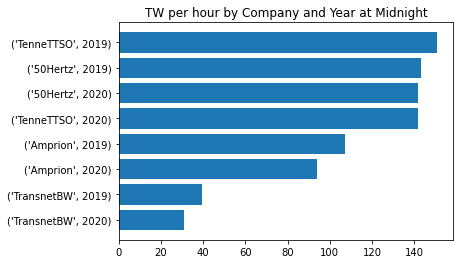

In [5]:
#B
#midnight_graph=midnight.plot(kind='barh',title='TW By Company Per Year At Midnight')
#noon_graph=noon.plot(kind='barh',title='TW By Company Per Year At Noon',color='red')
bars=(midnight.index)
midnight_graph=pl.barh(numpy.arange(len(bars)),list(midnight['00:00:00']),tick_label=bars)
pl.title('TW per hour by Company and Year at Midnight')
pl.savefig('midnight_graph.png')

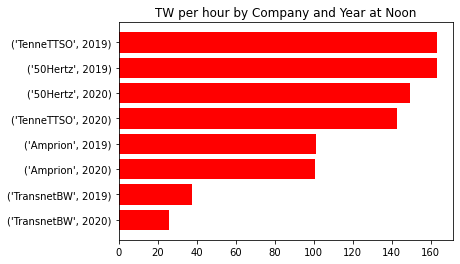

In [6]:
#C
noon_graph=pl.barh(numpy.arange(len(bars)),list(noon['12:00:00']),tick_label=bars,color='red')
pl.title('TW per hour by Company and Year at Noon')
pl.savefig('Noon_graph.png')

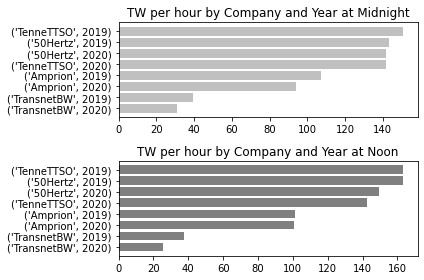

In [7]:
#Part 6
figure,axis=pl.subplots(2)
axis[0].barh(numpy.arange(len(bars)),list(midnight['00:00:00']),tick_label=bars,color='silver')
axis[0].set_title('TW per hour by Company and Year at Midnight')

axis[1].barh(numpy.arange(len(bars)),list(noon['12:00:00']),tick_label=bars,color='gray')
axis[1].set_title('TW per hour by Company and Year at Noon')
figure.tight_layout()
pl.savefig('Combined_graph.png')

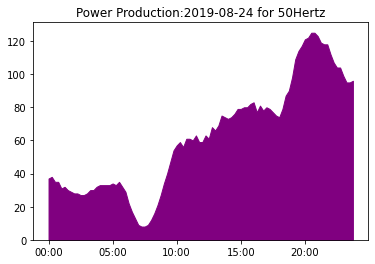

In [57]:
#Part 7
hertz=man.query('Company=="50Hertz"')
amprion=man.query('Company=="Amprion"')
transnet=man.query('Company=="TransnetBW"')
tenne=man.query('Company=="TenneTTSO"')

def daily_view(dataframe, company, date,color):
    company_data=dataframe.query(f'Company=="{company}" and Date=="{date}"')
    times=list(company_data.columns)[2:]
    figure,axis=pl.subplots(1)
    axis.stackplot(range(len(times)),list(company_data.T[company_data.T.columns[0]])[2:],color=color)
    axis.set_title(f'Power Production:{date} for {company}')
    axis.set_xticks([0,20,40,60,80])
    axis.set_xticklabels(['00:00','05:00','10:00','15:00','20:00'])
daily_view(man,'50Hertz','2019-08-24','purple')


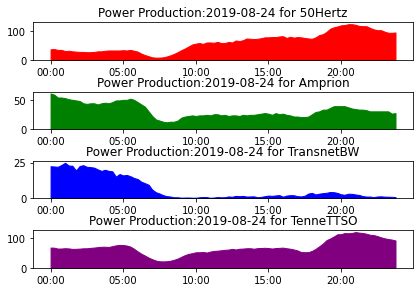

In [66]:
#Bonus
def daily_views(dataframe, companies, date,color):
    figure,axis=pl.subplots(len(companies))
    figure.tight_layout()
    for company in companies:
        company_data=dataframe.query(f'Company=="{company}" and Date=="{date}"')
        times=list(company_data.columns)[2:]
        axis[companies.index(company)].stackplot(range(len(times)),list(company_data.T[company_data.T.columns[0]])[2:],color=color[companies.index(company)])
        axis[companies.index(company)].set_title(f'Power Production:{date} for {company}')
        axis[companies.index(company)].set_xticks([0,20,40,60,80])
        axis[companies.index(company)].set_xticklabels(['00:00','05:00','10:00','15:00','20:00'])
daily_views(man,['50Hertz','Amprion','TransnetBW','TenneTTSO'],'2019-08-24',['Red','Green','Blue','purple'])

In [70]:
#Part 2
iris=seaborn.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

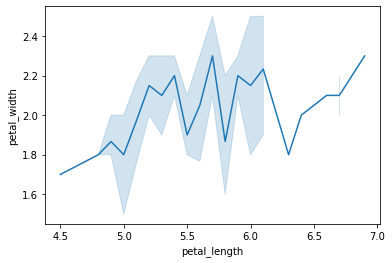

In [71]:
#LinePlot
petal_length=iris.query('species=="virginica"')
seaborn.lineplot(data=petal_length,x='petal_length',y='petal_width')

<AxesSubplot:xlabel='sepal_length'>

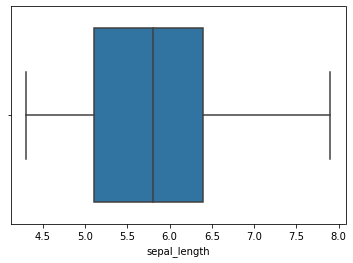

In [74]:
#BoxPlot
seaborn.boxplot(x=iris['sepal_length'])

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

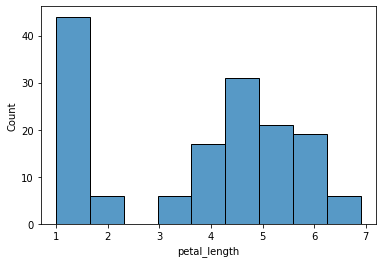

In [76]:
#Histogram
seaborn.histplot(data=iris,x='petal_length')

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

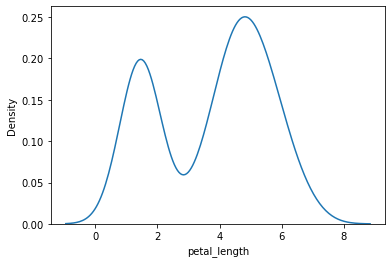

In [78]:
#Kernal Density
seaborn.kdeplot(data=iris,x='petal_length')

<AxesSubplot:xlabel='Date', ylabel='Company'>

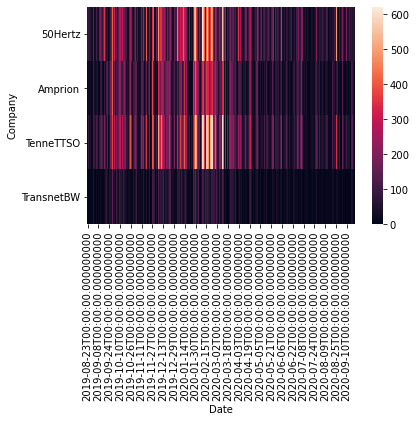

In [100]:
#Heatmap
groups=man.pivot('Company','Date','00:00:00')
seaborn.heatmap(groups)

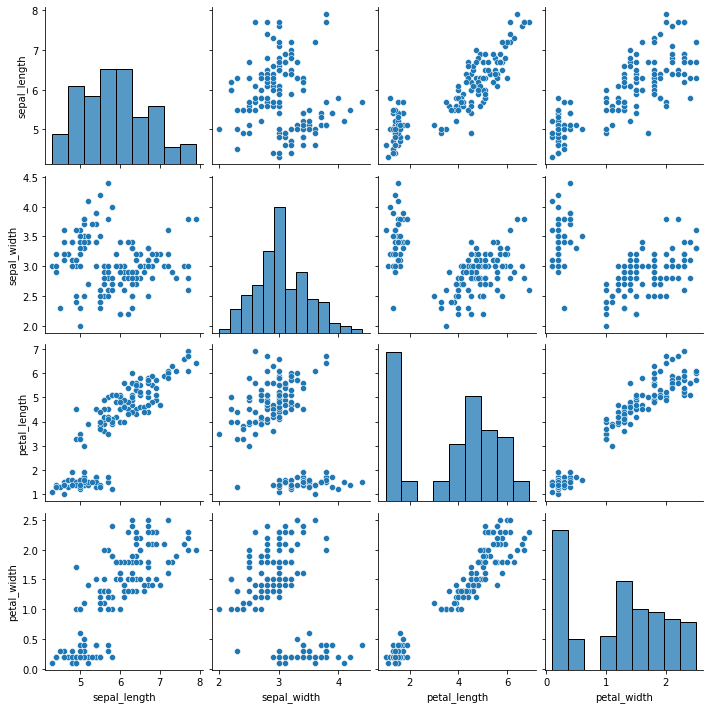

In [101]:
#Seaborn Pairs plot
seaborn.pairplot(iris)